## 1. 손글씨 데이터

### (1) 필요한 모듈 import하기

In [1]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [3]:
print('Hello')

Hello


### (2) 데이터 준비

In [4]:
digits = load_digits()

### (3) 데이터 이해하기

In [5]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
# Feature / Label Data 지정
digits_f = digits.data
digits_t = digits.target
digits_n = digits.target_names

In [7]:
# Target Names 출력
digits_n

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
# feature와 target data의 size 확인
print(len(digits_f), len(digits_t), len(digits_n))

1797 1797 10


(-0.5, 7.5, 7.5, -0.5)

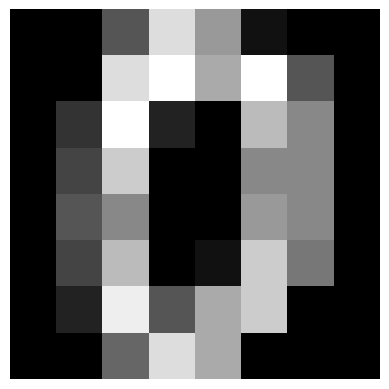

In [9]:
# 데이터 이미지로 출력
plt.imshow(digits_f[0].reshape(8,8), cmap='gray')
plt.axis('off')

In [10]:
# 데이터 상세설명 출력
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [11]:
# target 데이터 각 클래스 샘플 수 출력
class_counts = np.bincount(digits.target)
class_counts

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

> 0~9까지의 데이터가 균일하게 분포되어 있는 것을 확인할 수 있다.

### (4) train, test 데이터 분리

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    digits_f, digits_t, test_size=0.2, random_state=7)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


### (5) 다양한 모델로 학습시켜보기

#### Decision Tree 사용해 보기

In [14]:
decision_tree = DecisionTreeClassifier(random_state=32) # 모델 생성

decision_tree.fit(X_train, y_train) # 모델 학습
decision_y_predict = decision_tree.predict(X_test) # 예측

print(classification_report(y_test, decision_y_predict)) # 보고서 출력

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



#### Random Forest 사용해보기

In [15]:
random_forest = RandomForestClassifier(random_state=32)

random_forest.fit(X_train, y_train)
random_forest_y_predict = random_forest.predict(X_test)

print(classification_report(y_test, random_forest_y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



#### SVM 사용해 보기

In [16]:
svm_model = svm.SVC(random_state=32)

svm_model.fit(X_train, y_train)
svm_model_y_predict = svm_model.predict(X_test)

print(classification_report(y_test, svm_model_y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



#### SGD Classifier 사용해 보기

In [17]:
sgd_model = SGDClassifier(random_state=32)

sgd_model.fit(X_train, y_train)
sgd_model_y_predict = sgd_model.predict(X_test)

print(classification_report(y_test, sgd_model_y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.85      0.95      0.90        42
           2       0.98      1.00      0.99        40
           3       0.89      0.94      0.91        34
           4       1.00      0.97      0.99        37
           5       0.93      1.00      0.97        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.88      0.88      0.88        43
           9       0.96      0.72      0.82        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



#### Logistic Regression 사용해 보기

In [18]:
lr_model = LogisticRegression(random_state=32)

lr_model.fit(X_train, y_train)
lr_model_y_predict = lr_model.predict(X_test)

print(classification_report(y_test, lr_model_y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



### (6) 모델을 평가해 보기

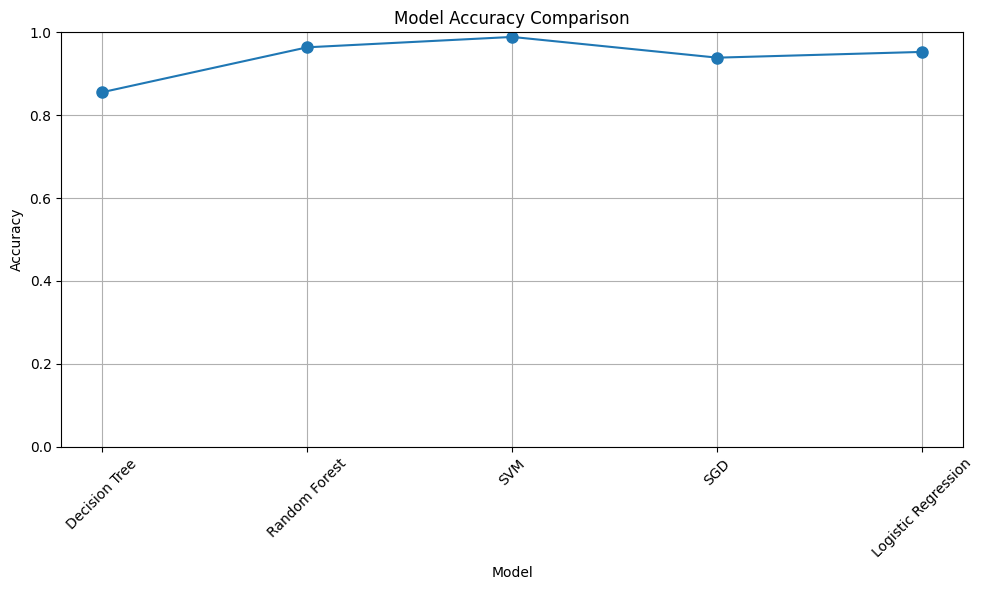

In [19]:
# 각 모델 학습 및 정확도 측정
models = [decision_tree, random_forest, svm_model, sgd_model, lr_model]
model_names = ["Decision Tree", "Random Forest", "SVM", "SGD", "Logistic Regression"]
digits_accuracies = [] # 정확도 저장 리스트 생성

for model, name in zip(models, model_names):
    model.fit(X_train, y_train) # 학습
    y_pred = model.predict(X_test) # 예측
    accuracy = accuracy_score(y_test, y_pred) # 정확도 계산
    digits_accuracies.append(accuracy) # 정확도 추가
    
# 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(model_names, digits_accuracies, marker='o', linestyle='-', markersize=8)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(True) # 그리드 표시
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. 해석
> 각 모델 별 정확도를 시각화한 결과, SVM 이 가장 높고, Decision Tree가 가장 정확도가 떨어지는 것으로 나타났다.
> Precision 와 Recall 모두 높게 나온 것으로 보아, 다섯개의 모델 모두 예측을 잘 한것으로 보인다.
> 
2. 선택한 평가지표: 정확도
3. 이유
    - 손글씨 분류 데이터의 target 데이터 클래스 간 분포를 확인한 결과, 균형이 있는 편이었다. 그래서 모델 성능 지표로 정확도를 선택했다.


## 2. 와인 데이터

### (1) 필요한 모듈 import하기


In [20]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### (2) 데이터 준비

In [21]:
wines = load_wine()

### (3) 데이터 이해하기


In [22]:
wines.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [23]:
wines_f = wines.data
wines_t = wines.target
wines_n = wines.target_names

In [24]:
wines_n

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [25]:
print(len(wines_f), len(wines_t), len(wines_n))

178 178 3


In [26]:
df_wines = pd.DataFrame(data = wines_f, columns =  wines.feature_names)
df_wines.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [27]:
# target 데이터 각 클래스 샘플 수 출력
w_class_counts = np.bincount(wines.target)
w_class_counts

array([59, 71, 48])

### (4) train, test 데이터 분리

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    wines_f, wines_t, test_size=0.2, random_state=7)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


### (5) 다양한 모델로 학습시켜보기


#### Decision Tree 사용해 보기

In [30]:
decision_tree = DecisionTreeClassifier(random_state=32)

decision_tree.fit(X_train, y_train)
decision_y_predict = decision_tree.predict(X_test)

print(classification_report(y_test, decision_y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



#### Random Forest 사용해보기

In [31]:
random_forest = RandomForestClassifier(random_state=32)

random_forest.fit(X_train, y_train)
random_forest_y_predict = random_forest.predict(X_test)

print(classification_report(y_test, random_forest_y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### SVM 사용해 보기

In [32]:
svm_model = svm.SVC(random_state=32)

svm_model.fit(X_train, y_train)
svm_model_y_predict = svm_model.predict(X_test)

print(classification_report(y_test, svm_model_y_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



#### SGD Classifier 사용해 보기

In [33]:
sgd_model = SGDClassifier(random_state=32)

sgd_model.fit(X_train, y_train)
sgd_model_y_predict = sgd_model.predict(X_test)

print(classification_report(y_test, sgd_model_y_predict))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.59      0.94      0.73        17
           2       0.00      0.00      0.00        12

    accuracy                           0.64        36
   macro avg       0.46      0.65      0.53        36
weighted avg       0.43      0.64      0.51        36



#### Logistic Regression 사용해 보기

In [34]:
lr_model = LogisticRegression(random_state=32)

lr_model.fit(X_train, y_train)
lr_model_y_predict = lr_model.predict(X_test)

print(classification_report(y_test, lr_model_y_predict))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



### (6) 모델을 평가해 보기

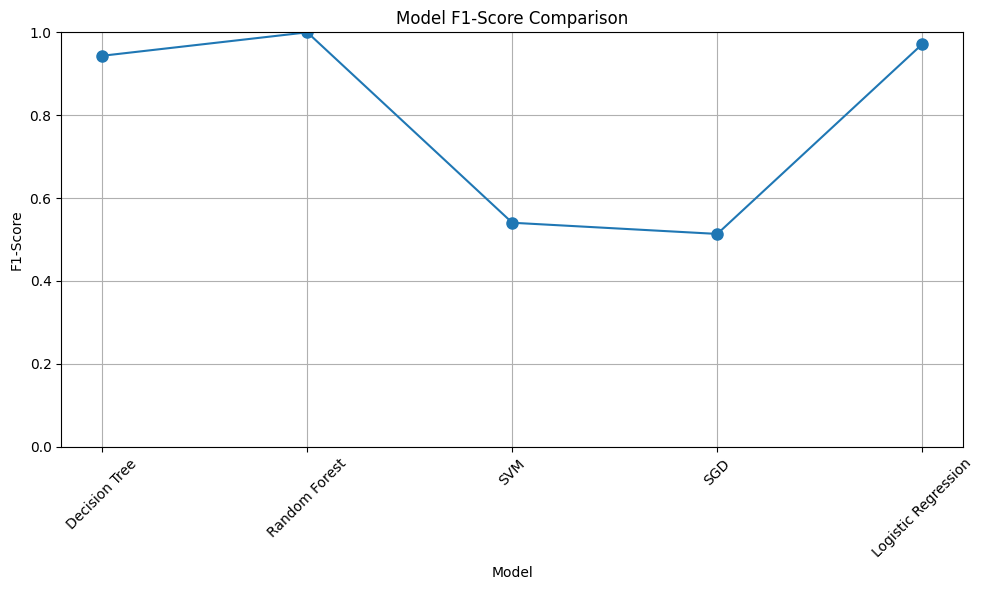

In [35]:
# 각 모델 학습 및 정확도 측정
models = [decision_tree, random_forest, svm_model, sgd_model, lr_model]
model_names = ["Decision Tree", "Random Forest", "SVM", "SGD", "Logistic Regression"]
wine_f1 = [] # 정확도 저장 리스트 생성

for model, name in zip(models, model_names):
    model.fit(X_train, y_train) # 학습
    y_pred = model.predict(X_test) # 예측
    report = classification_report(y_test, y_pred, output_dict = True)
    wine_f1_score = report['weighted avg']['f1-score'] # f1-score
    wine_f1.append(wine_f1_score) # f1-score 추가
    
# 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(model_names, wine_f1, marker='o', linestyle='-', markersize=8)
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('Model F1-Score Comparison')
plt.grid(True) # 그리드 표시
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. 해석
> wine 데이터의 target 데이터 클래스 간 분포를 확인한 결과, 클래스가 불균형한 편이었다.
> Precision 와 Recall 모두 높게 나온 것으로 보아, 다섯개의 모델 모두 예측을 잘 한것으로 보인다.
> 
2. 선택한 평가지표: f1-score
3. 이유
    - f1-score는 1에 가까울수록 모델이 매우 우수한 성능을 보임을 의미한다. 시각화 결과, f1-score가 가장 높은 모델은 Random Forest 이다.


## 3. 유방암 데이터

### (1) 필요한 모듈 import하기

In [36]:
from sklearn.datasets import load_breast_cancer

### (2) 데이터 준비

In [37]:
breast_cancer = load_breast_cancer()

### (3) 데이터 이해하기

In [38]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [39]:
breast_cancer_f = breast_cancer.data
breast_cancer_t = breast_cancer.target
breast_cancer_n = breast_cancer.target_names

In [40]:
breast_cancer_n

array(['malignant', 'benign'], dtype='<U9')

In [41]:
print(len(breast_cancer_f), len(breast_cancer_t), len(breast_cancer_n))

569 569 2


In [42]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [43]:
# target 데이터 각 클래스 샘플 수 출력
bc_class_counts = np.bincount(breast_cancer.target)
bc_class_counts

array([212, 357])

### (4) train, test 데이터 분리

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer_f, breast_cancer_t, test_size=0.2, random_state=7)

In [45]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


### (5) 다양한 모델로 학습시켜보기

#### Decision Tree 사용해 보기

In [46]:
decision_tree = DecisionTreeClassifier(random_state=32)

decision_tree.fit(X_train, y_train)
decision_y_predict = decision_tree.predict(X_test)

print(classification_report(y_test, decision_y_predict))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



#### Random Forest 사용해보기

In [47]:
random_forest = RandomForestClassifier(random_state=32)

random_forest.fit(X_train, y_train)
random_forest_y_predict = random_forest.predict(X_test)

print(classification_report(y_test, random_forest_y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



#### SVM 사용해 보기

In [48]:
svm_model = svm.SVC(random_state=32)

svm_model.fit(X_train, y_train)
svm_model_y_predict = svm_model.predict(X_test)

print(classification_report(y_test, svm_model_y_predict))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



#### SGD Classifier 사용해 보기

In [49]:
sgd_model = SGDClassifier(random_state=32)

sgd_model.fit(X_train, y_train)
sgd_model_y_predict = sgd_model.predict(X_test)

print(classification_report(y_test, sgd_model_y_predict))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        40
           1       0.86      1.00      0.92        74

    accuracy                           0.89       114
   macro avg       0.93      0.85      0.87       114
weighted avg       0.91      0.89      0.89       114



#### Logistic Regression 사용해 보기

In [50]:
lr_model = LogisticRegression(random_state=32)

lr_model.fit(X_train, y_train)
lr_model_y_predict = lr_model.predict(X_test)

print(classification_report(y_test, lr_model_y_predict))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### (6) 모델을 평가해 보기

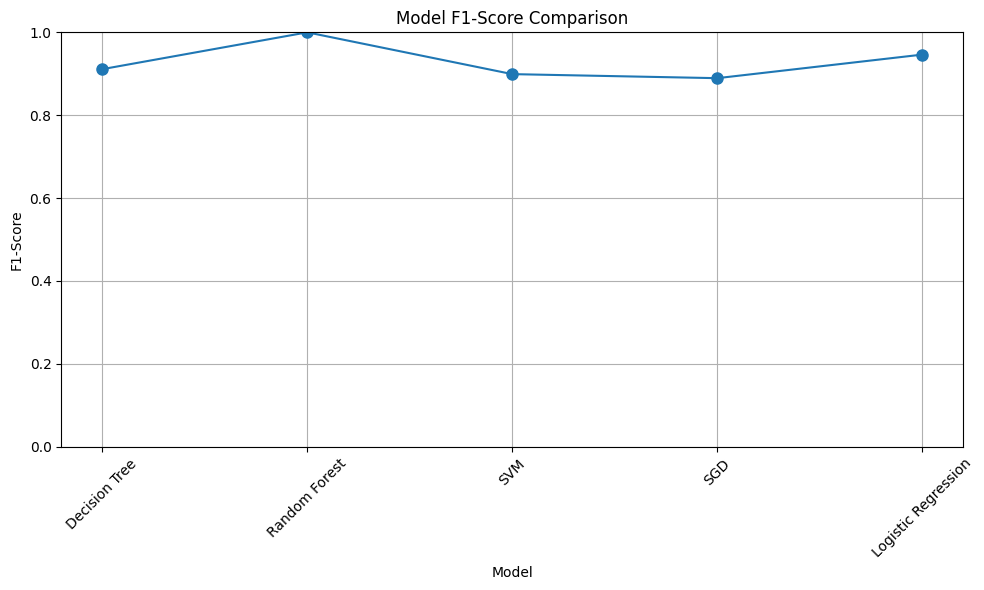

In [51]:
# 각 모델 학습 및 정확도 측정
models = [decision_tree, random_forest, svm_model, sgd_model, lr_model]
model_names = ["Decision Tree", "Random Forest", "SVM", "SGD", "Logistic Regression"]
cancer_f1 = [] # f1-score 저장 리스트 생성

for model, name in zip(models, model_names):
    model.fit(X_train, y_train) # 학습
    y_pred = model.predict(X_test) # 예측
    report = classification_report(y_test, y_pred, output_dict = True)
    cancer_f1_score = report['weighted avg']['f1-score'] # f1-score
    cancer_f1.append(cancer_f1_score) # f1-score 추가
    
# 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(model_names, cancer_f1, marker='o', linestyle='-', markersize=8)
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('Model F1-Score Comparison')
plt.grid(True) # 그리드 표시
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. 해석
> 유방암 데이터의 target 데이터 클래스 간 분포를 확인한 결과, 클래스가 불균형한 편이었다.
> Precision 와 Recall 모두 높게 나온 것으로 보아, 다섯개의 모델 모두 예측을 잘 한것으로 보인다.
> 
2. 선택한 평가지표: f1-score
3. 이유
    - f1-score는 1에 가까울수록 모델이 매우 우수한 성능을 보임을 의미한다. 시각화 결과, f1-score가 가장 높은 모델은 Random Forest 이다.


## 회고 - 김민지
### 어려웠던 점 / 느낀점
> - 이번 프로젝트는 여러 데이터에 다양한 분류 모델을 각각 적용시키고 모델 성능을 평가했다. 프로젝트를 하면서서 크게 어려웠던 점은 없었으나, 모델 성능을 평가할 때 사용할 지표를 선택하는 것이 조금 어려웠다. 특히, 오차 행렬에서 예측 결과를 네 가지로 구분하는데 각각 개념을 완벽하게 이해하고 암기하려고 하는 점이 살짝 힘들었다. 하지만 모델 성능 평가는 가장 중요하기 때문에 해당 내용은 완벽하게 숙지를 해야할 것 같다.  


### 학습한 내용
> - 평소에 Random Forest 모델을 자주 사용했었는데, 이번 프로젝트를 통해 그 외에 다양한 분류 모델을 사용해봤다. 각 모델이 어떤 원리로 동작하는지 완전히 알지는 못하지만 Random Forest 모델이 대체적으로 우수한 성능을 보이는 것을 확인했다. 그래서 예전에 이런 글을 봤는데.. 'Random Forest는 빈 깡통 모델이어도 성능이 괜찮다'라는 말에 공감이 갔다.
> - 데이터 분석의 마지막 단계(?)인 모델링 단계의 전체적인 흐름을 파악할 수 있었다. 모델을 돌리기 위해 데이터를 어떻게 준비하는지부터 모델 성능을 평가하는지 까지의 코드 흐름을 파악하는 데 도움이 많이 됐다. 어떤 데이터를 사용하든, 어떤 모델을 사용하든 그 흐름은 비슷하다는 것을 깨달았다. 여기서 달라진다면... 하이퍼 파라미터 튜닝이나 교차 검증 등을 추가할 수 있을 것 같다.

## 회고 - 허지은 

## 프로젝트에서 배운점과 느낀점
> 분류모델에 대해 자세히 알 수 있었다.
> sklearn을 사용해서 간단한 모델들을 만들어 볼수 있었다.
> Decision Tree, Random Forest, SVM, SGD, Logistic regression을 사용할 수 있게 되었다. 
    > Decision Tree : 의사결정 나무로 범주나 연속형 수치 모두 예측할 수 있음, 예측값의 종류는 terminal노드의 갯수와 동일 
    > Random Forest :  Decision Tree를 여러개 합쳐놓은 것(앙상블 기법), Decision Tree의 단점을 보완할 수 있음 
> 다양한 지표들을 확인하여 평가지표를 선택할 수 있다.
    > precision : 음성인데 양성이라고 판단한 경우.
    > recall : 양성인데 음성이라고 판단한 경우.
    > recall과 precision의 값을 합친것이 F1 score.

## 오류해결과정
> Logistic Regression모델을 학습시키던 중 경고문이 떠서 max_iter를 사용해 반복횟수를 정해주었다. 정해진 반복수가 충분하지 않을 경우에 clasifier_report를 작성할때 경고문이 뜰수 있기때문에 충분한 반복수를 설정해 줘야 한다. 
> wine data에서 random forest의 정확도가 1.0으로 나오는 경우를 확인했다. 오버피팅의 우려가 있어 다른 random state로 변경해 보았지만 SGD의 정확도가 0.75이상이 되면 random state의 정확도가 1.0으로 나오는것을 확인했다.

## 아쉬운점이나 더 적용하고 싶은 점 
> SVM, SGD, Logiscit Regression은 모델이 어떻게 동작하는지 정확히 파악하지 못하고 작성한 것이 아쉽다.
> 순도를 확인하는 엔트로피와 지니계수에 대해 알아보지 못한것이 아쉬웠다. 


## 회고 - 이동원
### 어려웠던 점 / 느낀점
> - 이번 프로젝트는 여러 데이터에 다양한 분류 모델을 각각 적용시키고 모델 성능을 평가했다. 프로젝트를 하면서서 크게 어려웠던 점은 없었다. 오히려 석사 과정 1학기때 날림으로 배웠던 내용들을 다시 되돌아보는 시간을 거칠 수 있어서 너무 좋았습니다. 그리고 무엇보다도 팀원분들이 너무나도 잘 도와주셔서 무사히 잘 마무리 할 수 있었습니다.


### 학습한 내용
> - 드디어 Random Forest의 개념을 완벽하게 설명할 수 있게되었습니다.

## 참고
- https://blog.naver.com/fbfbf1/222453580598